<a href="https://colab.research.google.com/github/Mathurshab2210/Ml_with_Mathur/blob/main/Loan_prediction_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#data processing
loan=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan.shape

(614, 13)

In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan=loan.dropna()

In [8]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
#label encodind
loan.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)
loan.replace({'Married':{'No':0,'Yes':1},'Self_Employed':{'No':0,'Yes':1}},inplace=True)
loan.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
loan.replace({'Education':{'Not Graduate':0,'Graduate':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)


In [29]:
loan.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,0,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,0,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,LP001024,0,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


In [11]:
loan['Dependents']

1       1
2       0
3       0
4       0
5       2
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 480, dtype: object

In [12]:
loan=loan.replace(to_replace='3+',value=4)

In [13]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [14]:
loan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

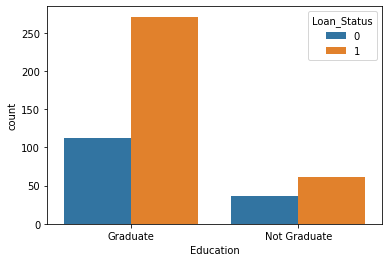

In [15]:
#education vs loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan)

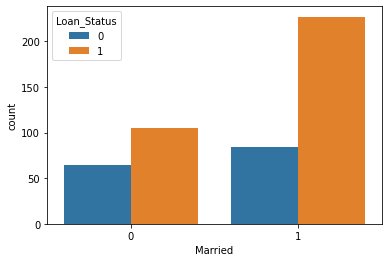

In [30]:
sns.countplot(x='Married',hue='Loan_Status',data=loan)

In [32]:
loan=loan.drop('Loan_ID',axis=1)

In [33]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [34]:
x=loan.drop('Loan_Status',axis=1)#axis=1 removes column,axis=0 removes row
y=loan['Loan_Status']

In [35]:
x,y

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 1         0        1          1          1              0             4583   
 2         0        1          0          1              1             3000   
 3         0        1          0          0              0             2583   
 4         0        0          0          1              0             6000   
 5         0        1          2          1              1             5417   
 ..      ...      ...        ...        ...            ...              ...   
 609       1        0          0          1              0             2900   
 610       0        1          4          1              0             4106   
 611       0        1          1          1              0             8072   
 612       0        1          2          1              0             7583   
 613       1        0          0          1              1             4583   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_T

In [36]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=2,train_size=0.78)

In [111]:
x_train


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
312,1,0,0,1,0,2507,0.0,56.0,360.0,1.0,0
353,1,1,0,1,1,5500,0.0,105.0,360.0,0.0,0
172,0,1,4,0,0,3522,0.0,81.0,180.0,1.0,0
424,0,1,0,1,0,14880,0.0,96.0,360.0,1.0,1
354,1,1,0,1,0,2423,505.0,130.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
459,0,1,0,1,0,8334,0.0,160.0,360.0,1.0,1
194,0,0,0,1,0,4191,0.0,120.0,360.0,1.0,0
76,0,0,0,1,0,3750,4750.0,176.0,360.0,1.0,2
286,1,0,0,1,1,2600,1717.0,99.0,300.0,1.0,1


In [102]:
x_test.shape

(106, 11)

In [103]:
classifier=svm.SVC(kernel='linear')

In [104]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [105]:
x_train_pred=classifier.predict(x_train)

In [106]:
training_data_acc=accuracy_score(x_train_pred,y_train)

In [107]:
training_data_acc

0.7914438502673797

In [108]:
x_test_pred=classifier.predict(x_test)

In [109]:
test_data_acc=accuracy_score(x_test_pred,y_test)

In [110]:
test_data_acc

0.8207547169811321

In [127]:
print("Enter which row")
n=int(input("Start :"))
m=int(input('End(will be excluded) :'))
s1=x_test[n:m]
op=classifier.predict(s1)

Enter which row
Start :32
End(will be excluded) :33


In [128]:
op

array([1])

In [129]:
if op ==1:
  print('loan approved')
else:
  print("loan not approved")

loan approved
